Dataset:- https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 439 kB 59.9 MB/s 
     |████████████████████████████████| 1.7 MB 42.7 MB/s 
     |████████████████████████████████| 6.0 MB 55.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [1]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#Data we have received is Zip format so, we have unzip the Dataset

import zipfile
import io
zf = zipfile.ZipFile("/content/dogs-vs-cats.zip", "r")
zf.extractall("/content")
zf.close()

Ref: https://keras.io/api/data_loading/

In [4]:
# Importing the Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [5]:
print(tf.__version__)

2.9.2


In [6]:
# Data Preprocesing

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [7]:
#Reading the Training Dataset
training_set = train_datagen.flow_from_directory("/content/dogs_vs_cats/train",
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = "binary")


Found 20000 images belonging to 2 classes.


In [8]:
#Preprocess the Test size
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
#Reading Test DataSet
test_set = test_datagen.flow_from_directory("/content/dogs_vs_cats/test",
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = "binary")

Found 5000 images belonging to 2 classes.


##### **Note:- We don't apply Data_Augmentation in "Test_Dataset"**

In [10]:
# L2 Regulazier for regularization

from tensorflow.keras.regularizers import l2

## **Creating CNN Model**

In [11]:
# Initialize the CNN
cnn = Sequential()

In [12]:
# Step 1 - Convolution
cnn.add(Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
#cnn.add(BatchNormalization())
# Step 2 - Pooling
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
#cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(units=128, activation='relu'))
#cnn.add(Dropout(0.1))
# Step 5 - Output Layer
#cnn.add(Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(units = 1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))

#### **Paramater**:- kernel_regularizer. Using L2 Norm with 0.01 value.Using Linear SVM

---

#### **Note**:- For Binary Classification We always use Linear SVM

In [13]:
## for mulitclassification
#cnn.add(Dense(units = 4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

#### **Training the CNN**

#### Loss: "Hing" will consider as an SVM

In [15]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [16]:
# Training the CNN on the Training set and evaluating it on the Test set
model_history =cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
625/625 [==============================] - 89s 138ms/step - loss: 0.8068 - accuracy: 0.6245 - val_loss: 0.6776 - val_accuracy: 0.7004
Epoch 2/10
625/625 [==============================] - 86s 138ms/step - loss: 0.6520 - accuracy: 0.6941 - val_loss: 0.6407 - val_accuracy: 0.7446
Epoch 3/10
625/625 [==============================] - 84s 134ms/step - loss: 0.6007 - accuracy: 0.7180 - val_loss: 0.5698 - val_accuracy: 0.7018
Epoch 4/10
625/625 [==============================] - 86s 137ms/step - loss: 0.5544 - accuracy: 0.7394 - val_loss: 0.5055 - val_accuracy: 0.7726
Epoch 5/10
625/625 [==============================] - 85s 136ms/step - loss: 0.5242 - accuracy: 0.7549 - val_loss: 0.4786 - val_accuracy: 0.7690
Epoch 6/10
625/625 [==============================] - 86s 137ms/step - loss: 0.5103 - accuracy: 0.7642 - val_loss: 0.5035 - val_accuracy: 0.7964
Epoch 7/10
625/625 [==============================] - 86s 138ms/step - loss: 0.4916 - accuracy: 0.7735 - val_loss: 0.4636 - val_ac

In [17]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


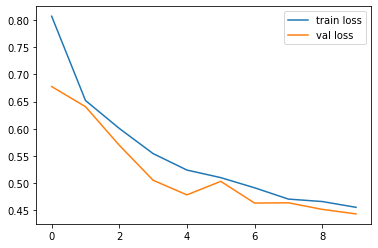

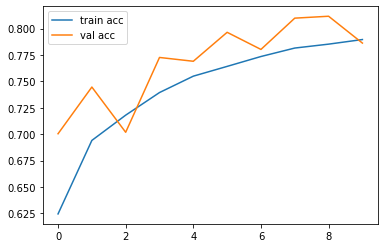

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(model_history .history['loss'], label='train loss')
plt.plot(model_history .history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_history .history['accuracy'], label='train acc')
plt.plot(model_history .history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

#### **Reference (Google Colab Notebook Proper Implementation):-**

https://colab.research.google.com/drive/14hUmYnsOV-laGY6XjMSXqmoB9E-g5McV?usp=sharing#scrollTo=HHBFNFHCtzLu